In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
SydneyHousePrices = pd.read_csv(r"C:\Users\Batuhan\SydneyHousePrices.csv")
df = SydneyHousePrices.copy()
df

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [6]:
df.select_dtypes(["object"]).columns

Index(['Date', 'suburb', 'propType'], dtype='object')

In [7]:
df["suburb"].value_counts() # mahalle

Castle Hill         1250
Strathfield         1248
Ermington           1248
Carlingford         1247
Auburn              1244
                    ... 
Paradise Point         1
Nattai                 1
Balmoral Village       1
Fiddletown             1
Glenmore               1
Name: suburb, Length: 685, dtype: int64

In [69]:
df["bed"].value_counts()

3.000000    83066
4.000000    63348
2.000000    23109
5.000000    22987
6.875000     5457
1.125000     1383
3.525537      154
Name: bed, dtype: int64

In [70]:
df["bath"].value_counts()

2.000    86482
1.000    73128
3.000    31858
4.375     8036
Name: bath, dtype: int64

In [71]:
df["car"].value_counts()

2.000000    91044
1.000000    61894
1.912745    18151
3.000000    15575
4.375000    12840
Name: car, dtype: int64

In [8]:
df["propType"].value_counts()

house                   170117
townhouse                15177
duplex/semi-detached      6722
villa                     5701
terrace                   1344
other                      392
warehouse                   40
acreage                     11
Name: propType, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,199504.0,9.975250e+04,5.759199e+04,1.0,49876.75,99752.5,149628.25,1.995040e+05
postalCode,199504.0,2.196379e+03,1.930535e+02,2000.0,2082.00,2144.0,2211.00,4.878000e+03
sellPrice,199504.0,1.269776e+06,6.948239e+06,1.0,720000.00,985000.0,1475000.00,2.147484e+09
bed,199350.0,3.516479e+00,1.066555e+00,1.0,3.00,3.0,4.00,9.900000e+01
bath,199504.0,1.890669e+00,9.260006e-01,1.0,1.00,2.0,2.00,9.900000e+01
car,181353.0,1.936224e+00,1.060237e+00,1.0,1.00,2.0,2.00,4.100000e+01


In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [11]:
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,Year,Month,Day
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019,6,19
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019,6,13
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house,2019,6,7
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019,5,28
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house,2019,5,22


In [12]:
df = df.drop(["Id","Date"],axis=1)

In [13]:
df

,suburb,postalCode,sellPrice,bed,bath,car,propType,Year,Month,Day
0,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019,6,19
1,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019,6,13
2,Whale Beach,2107,2920000,3.0,3,2.0,house,2019,6,7
3,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019,5,28
4,Whale Beach,2107,8000000,5.0,4,4.0,house,2019,5,22
...,...,...,...,...,...,...,...,...,...,...
199499,Illawong,2234,1900000,5.0,3,7.0,house,2014,6,20
199500,Illawong,2234,980000,4.0,3,2.0,house,2014,5,26
199501,Alfords Point,2234,850000,4.0,2,2.0,house,2014,4,17
199502,Illawong,2234,640000,3.0,2,2.0,townhouse,2013,9,7


In [68]:
house

NameError: name 'house' is not defined

In [14]:
list_name = []
list_type = []
list_total_value = []
list_missing_value = []
list_unique_value = []

for i in df.columns:
    list_name.append(i)
    list_type.append(str(df[i].dtype))
    list_total_value.append(df[i].notnull().sum())
    list_missing_value.append(df[i].isnull().sum())
    list_unique_value.append(len(df[i].unique()))

    df_info = pd.DataFrame(data={"Total_Value":list_total_value,"Missing_Value":list_missing_value,"Unique_Value":list_unique_value,"Type":list_type},index=list_name)

In [15]:
df_info

,Total_Value,Missing_Value,Unique_Value,Type
suburb,199504,0,685,object
postalCode,199504,0,235,int64
sellPrice,199504,0,8439,int64
bed,199350,154,31,float64
bath,199504,0,24,int64
car,181353,18151,27,float64
propType,199504,0,8,object
Year,199504,0,20,int64
Month,199504,0,12,int64
Day,199504,0,31,int64


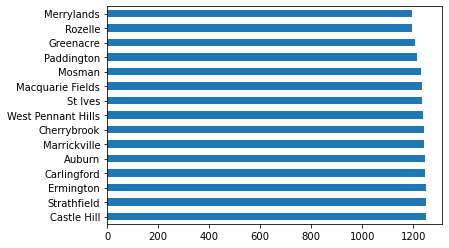

In [16]:
df["suburb"].value_counts()[:15].plot.barh()

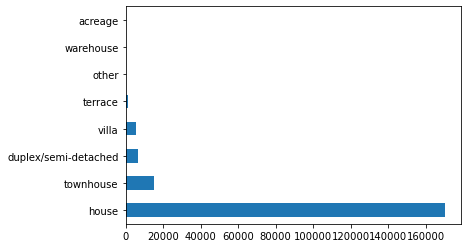

In [17]:
df["propType"].value_counts().plot.barh()

In [18]:
data_num = df.select_dtypes(["float64","int64"]).columns

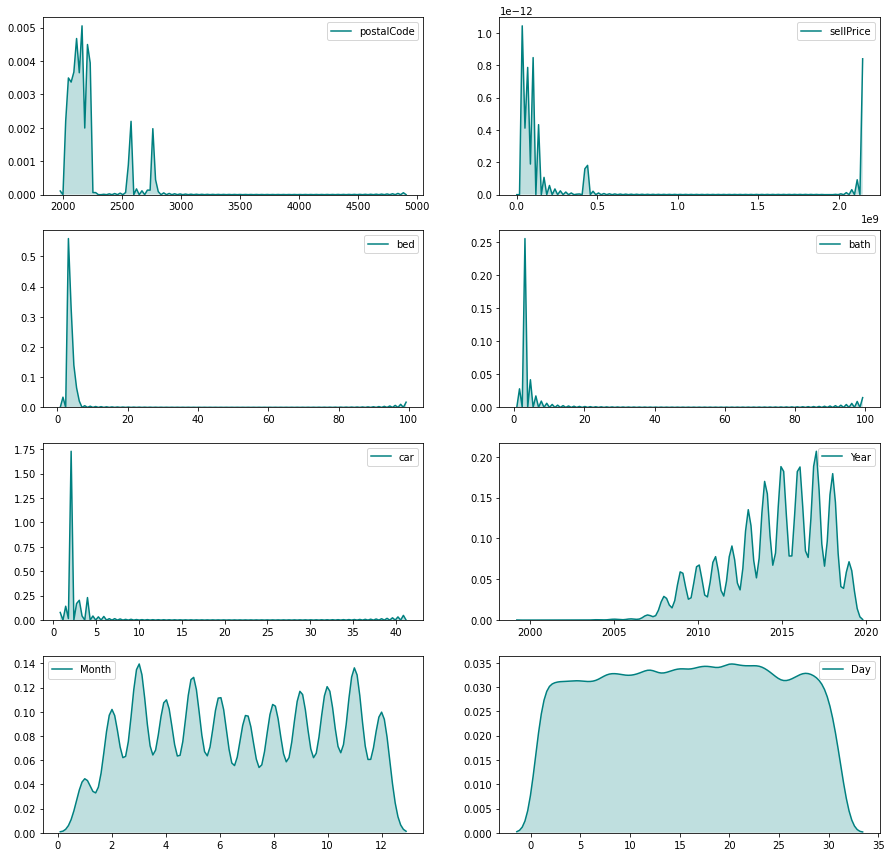

In [20]:
fig,ax=plt.subplots(nrows=4, ncols=2, figsize=(15,15))
count=0
for i in range(4):
    for j in range(2):
        sns.kdeplot(df[data_num[count]], ax = ax[i][j], shade=True, color="#008080")
        count+=1

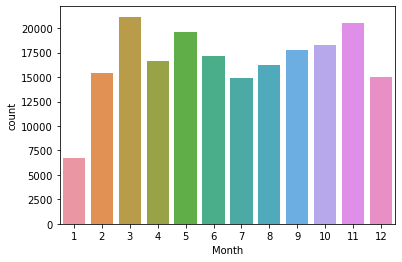

In [21]:
sns.countplot(df["Month"])

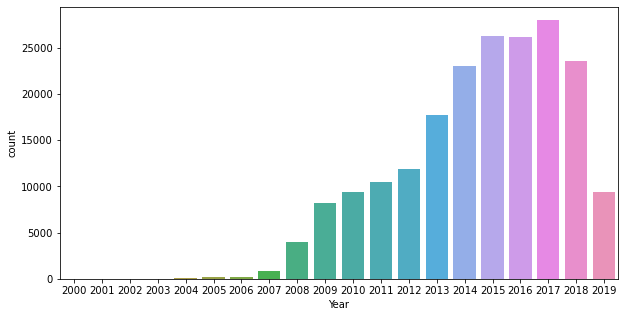

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df["Year"])

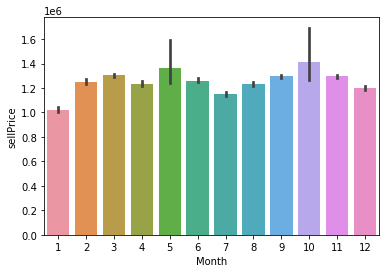

In [23]:
sns.barplot(x = df["Month"], y = df["sellPrice"], data = df) # Aylara göre ev fiyatları

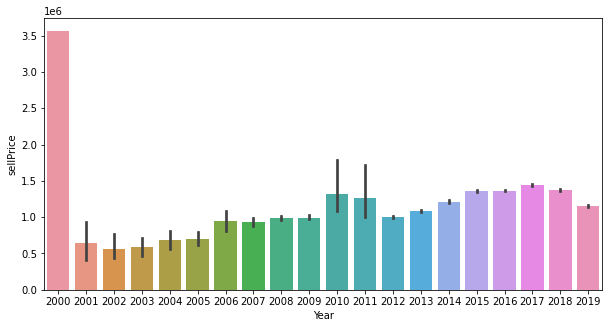

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x = df["Year"], y = df["sellPrice"], data = df) # Yıllara göre ev fiyatları


In [26]:
heat = pd.pivot_table(data = df,
                    index = 'Month',
                    values = 'sellPrice',
                    columns = 'Year')
heat.fillna(0, inplace = True)

In [27]:
heat

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,5.425000e+05,4.711429e+05,5.390000e+05,8.738989e+05,7.761932e+05,8.655699e+05,9.408946e+05,8.351405e+05,8.847274e+05,1.033905e+06,1.064638e+06,1.082105e+06,1.098014e+06,1.111665e+06,1.103597e+06
2,0.0,960000.000000,0.0,1.170000e+06,6.810000e+05,5.883846e+05,9.530778e+05,8.098638e+05,1.222199e+06,8.274488e+05,1.077278e+06,1.095220e+06,9.476650e+05,9.870070e+05,1.240268e+06,1.316328e+06,1.328119e+06,1.450235e+06,1.403733e+06,1.202588e+06
3,0.0,896000.000000,0.0,0.000000e+00,1.023571e+06,7.204231e+05,6.806750e+05,1.061631e+06,1.016767e+06,9.577356e+05,1.218498e+06,1.129113e+06,1.076347e+06,1.080301e+06,1.224513e+06,1.353020e+06,1.411728e+06,1.493161e+06,1.530250e+06,1.230277e+06
4,0.0,463000.000000,765000.0,3.500000e+05,6.400000e+05,5.895781e+05,5.430357e+05,1.007723e+06,1.120504e+06,1.071910e+06,1.046887e+06,1.065464e+06,9.836697e+05,1.020852e+06,1.201937e+06,1.285391e+06,1.347292e+06,1.443569e+06,1.359263e+06,1.182867e+06
5,0.0,0.000000,442500.0,0.000000e+00,5.578333e+05,1.536000e+06,9.557273e+05,9.076435e+05,1.027770e+06,9.338651e+05,3.268803e+06,1.058386e+06,1.063544e+06,1.080215e+06,1.187194e+06,1.381526e+06,1.358007e+06,1.497958e+06,1.387143e+06,1.061774e+06
6,0.0,0.000000,485000.0,3.210000e+05,5.450000e+05,7.477833e+05,1.663132e+06,8.595243e+05,1.110492e+06,9.907050e+05,1.145334e+06,9.979122e+05,9.768713e+05,1.067895e+06,1.216359e+06,1.427008e+06,1.375798e+06,1.479885e+06,1.412025e+06,1.110175e+06
7,0.0,0.000000,0.0,5.875000e+05,6.600000e+05,6.612222e+05,1.013944e+06,7.874846e+05,9.348692e+05,9.219211e+05,9.417419e+05,9.419387e+05,9.129772e+05,9.909445e+05,1.117141e+06,1.330783e+06,1.230604e+06,1.331828e+06,1.214728e+06,1.110664e+06
8,0.0,0.000000,0.0,1.100000e+06,5.045714e+05,5.981000e+05,1.696375e+06,8.558083e+05,9.708809e+05,9.337268e+05,1.060277e+06,9.420094e+05,9.909445e+05,1.057105e+06,1.171205e+06,1.401863e+06,1.340230e+06,1.392379e+06,1.378613e+06,0.000000e+00
9,0.0,372000.000000,0.0,6.900000e+05,9.348462e+05,8.413000e+05,1.064833e+06,8.916254e+05,1.056483e+06,1.049700e+06,1.154134e+06,9.820021e+05,1.020478e+06,1.120323e+06,1.242007e+06,1.423952e+06,1.416687e+06,1.505014e+06,1.456903e+06,0.000000e+00


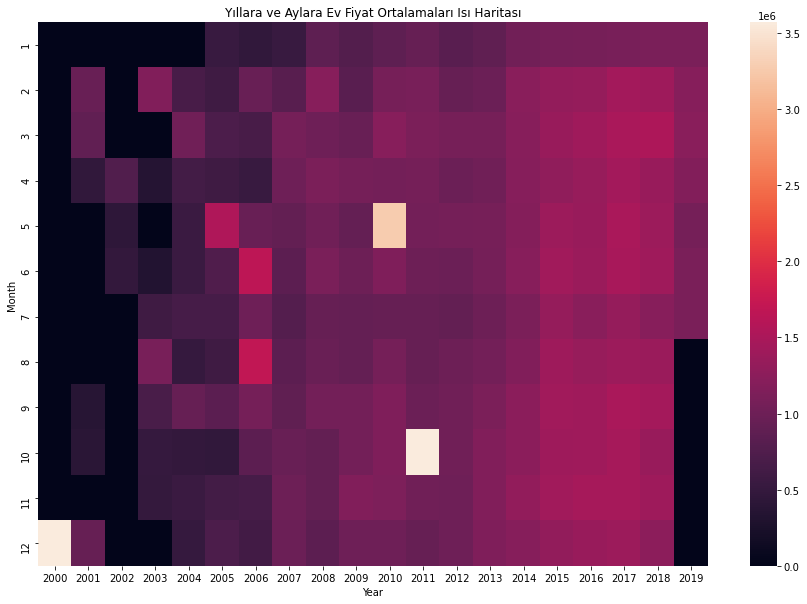

In [28]:
plt.figure(figsize=(15,10))
plt.title('Yıllara ve Aylara Ev Fiyat Ortalamaları Isı Haritası')
sns.heatmap(heat)

SyntaxError: invalid syntax (<ipython-input-31-f6c8b79bfe6d>, line 1)

In [32]:
import missingno as msno

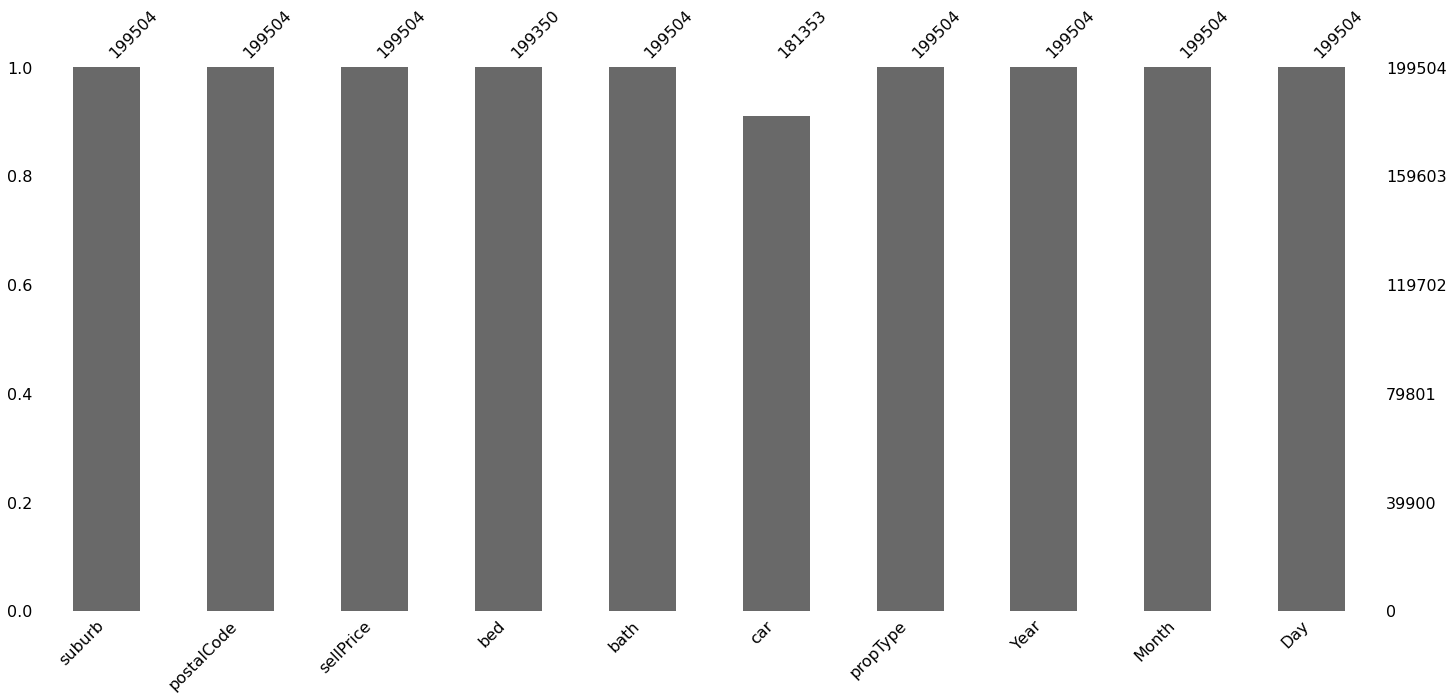

In [33]:
msno.bar(df)

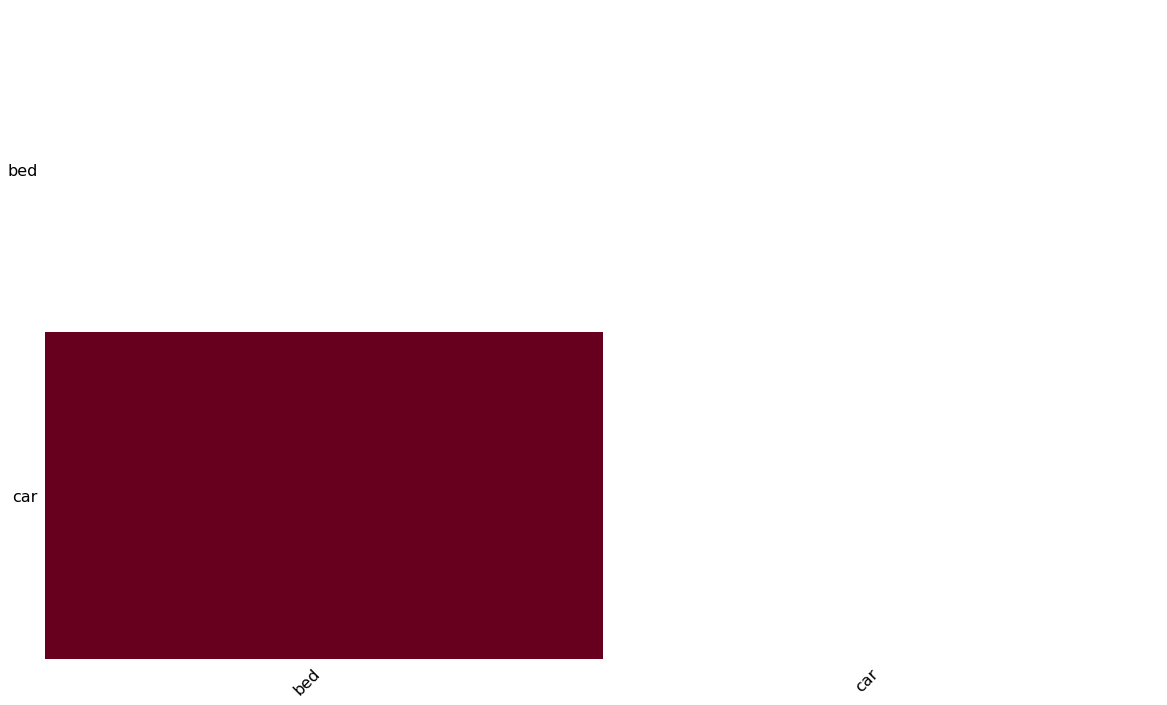

In [34]:
msno.heatmap(df)

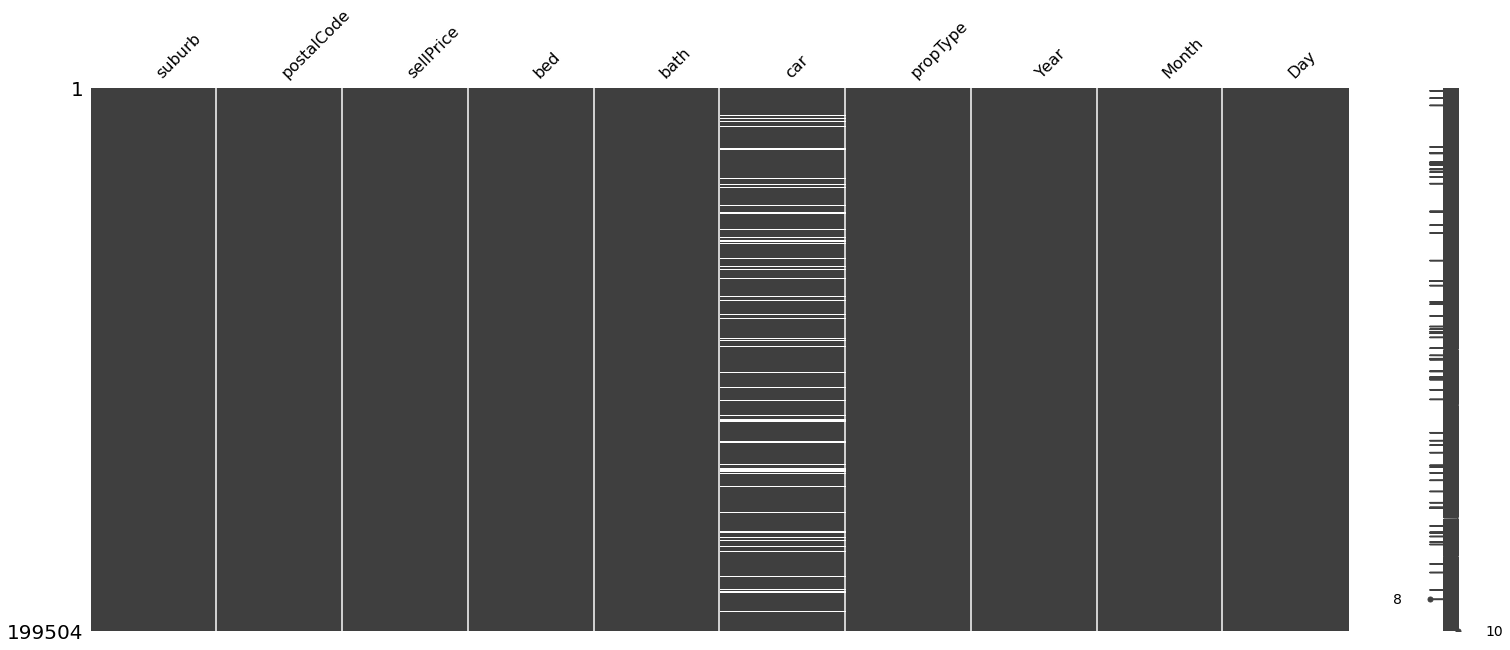

In [35]:
msno.matrix(df)

In [36]:
suburb_siniflandirma = (df.groupby('suburb')['sellPrice'].mean().sort_values(ascending = False))

In [37]:
suburb_siniflandirma

suburb
Point Piper         1.090144e+07
Darling Point       5.262649e+06
Collaroy Beach      4.926500e+06
Watsons Bay         4.612878e+06
Woolwich            4.526818e+06
                        ...     
Eagle Vale          4.615049e+05
Tarneit             4.554000e+05
Macquarie Fields    4.544467e+05
Yanderra            4.283465e+05
Oxenford            3.405000e+05
Name: sellPrice, Length: 685, dtype: float64

In [38]:
suburb_grup1 = list(suburb_siniflandirma[:137].index)
suburb_grup2 = list(suburb_siniflandirma[137:274].index)
suburb_grup3 = list(suburb_siniflandirma[274:411].index)
suburb_grup4 = list(suburb_siniflandirma[411:548].index)
suburb_grup5 = list(suburb_siniflandirma[548:685].index)

In [39]:
df.replace(suburb_grup1, 0, inplace=True)
df.replace(suburb_grup2, 1, inplace=True)
df.replace(suburb_grup3, 2, inplace=True)
df.replace(suburb_grup4, 3, inplace=True)
df.replace(suburb_grup5, 4, inplace=True)

In [40]:
df

,suburb,postalCode,sellPrice,bed,bath,car,propType,Year,Month,Day
0,1,2107,1210000,4.0,2,2.0,house,2019,6,19
1,1,2107,2250000,4.0,3,4.0,house,2019,6,13
2,0,2107,2920000,3.0,3,2.0,house,2019,6,7
3,1,2107,1530000,3.0,1,2.0,house,2019,5,28
4,0,2107,8000000,5.0,4,4.0,house,2019,5,22
...,...,...,...,...,...,...,...,...,...,...
199499,1,2234,1900000,5.0,3,7.0,house,2014,6,20
199500,1,2234,980000,4.0,3,2.0,house,2014,5,26
199501,1,2234,850000,4.0,2,2.0,house,2014,4,17
199502,1,2234,640000,3.0,2,2.0,townhouse,2013,9,7


In [41]:
df = pd.get_dummies(df,columns= ["suburb","propType"], prefix= ["suburb","propType"])

In [42]:
df

,postalCode,sellPrice,bed,bath,car,Year,Month,Day,suburb_0,suburb_1,...,suburb_3,suburb_4,propType_acreage,propType_duplex/semi-detached,propType_house,propType_other,propType_terrace,propType_townhouse,propType_villa,propType_warehouse
0,2107,1210000,4.0,2,2.0,2019,6,19,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2107,2250000,4.0,3,4.0,2019,6,13,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2107,2920000,3.0,3,2.0,2019,6,7,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2107,1530000,3.0,1,2.0,2019,5,28,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2107,8000000,5.0,4,4.0,2019,5,22,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199499,2234,1900000,5.0,3,7.0,2014,6,20,0,1,...,0,0,0,0,1,0,0,0,0,0
199500,2234,980000,4.0,3,2.0,2014,5,26,0,1,...,0,0,0,0,1,0,0,0,0,0
199501,2234,850000,4.0,2,2.0,2014,4,17,0,1,...,0,0,0,0,1,0,0,0,0,0
199502,2234,640000,3.0,2,2.0,2013,9,7,0,1,...,0,0,0,0,0,0,0,1,0,0


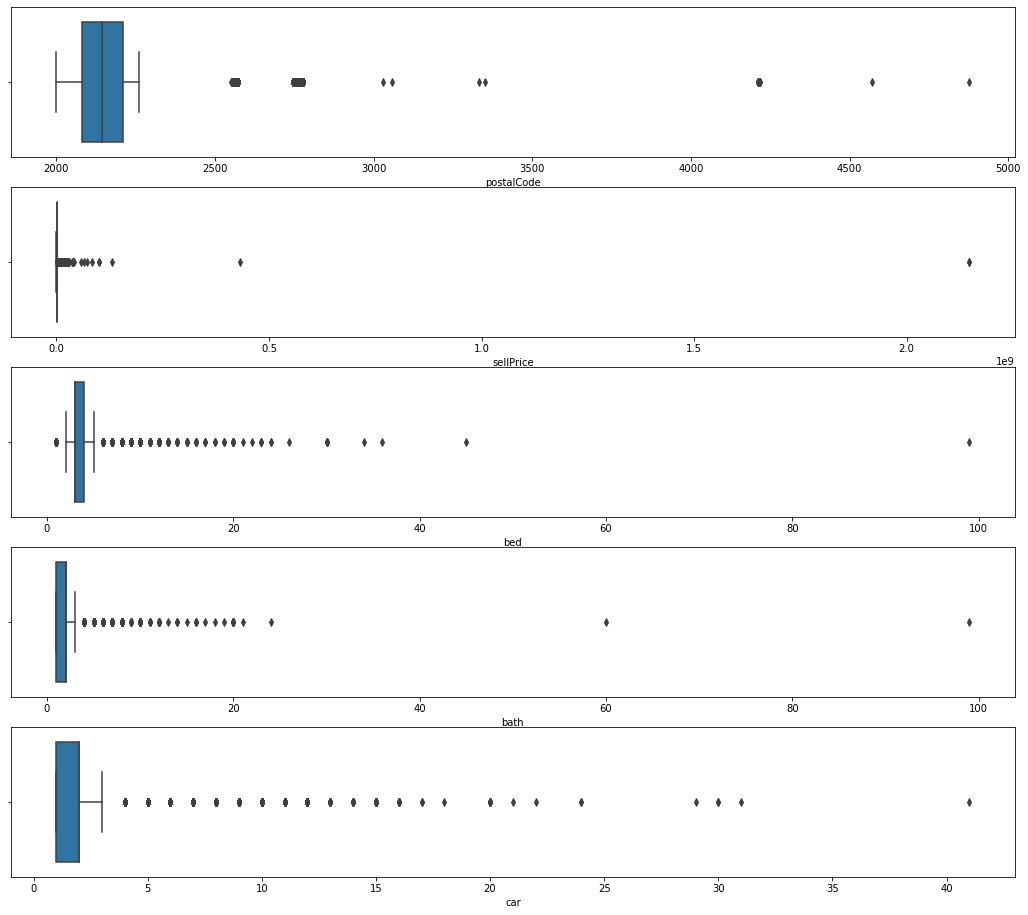

In [43]:
fig, ax =plt.subplots(nrows=5,ncols=1,figsize=(18,16))
for i in range(5):
    sns.boxplot(x = df[data_num[i]],ax=ax[i])
    count = count+1

In [44]:
data_num = list(df.select_dtypes(["int64","float64"]).columns)
data_num.remove("Year")
data_num.remove("Day")
data_num.remove("Month")

In [45]:
lower_and_upper = {}

for col in data_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = 1.5*(q3-q1)

    lower_bound = q1-iqr
    upper_bound = q3+iqr

    lower_and_upper[col] = (lower_bound, upper_bound)
    df.loc[(df.loc[:,col]<lower_bound),col] = lower_bound * 0.75
    df.loc[(df.loc[:,col]>upper_bound),col] = upper_bound * 1.25


lower_and_upper

{'postalCode': (1888.5, 2404.5),
 'sellPrice': (-412500.0, 2607500.0),
 'bed': (1.5, 5.5),
 'bath': (-0.5, 3.5),
 'car': (-0.5, 3.5)}

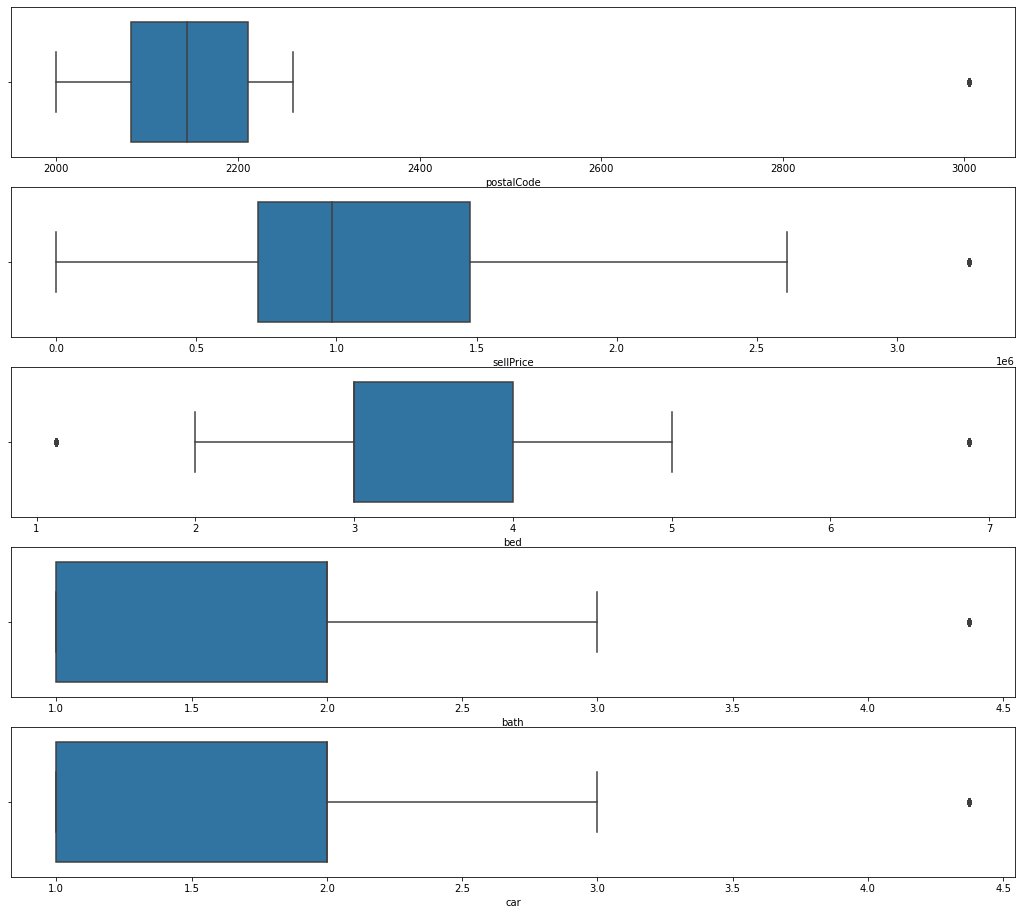

In [46]:
fig, ax =plt.subplots(nrows=5,ncols=1,figsize=(18,16))
for i in range(5):
    sns.boxplot(x = df[data_num[i]],ax=ax[i])
    count = count+1

In [47]:
from sklearn.impute import KNNImputer

In [48]:
df.isnull().sum()

postalCode                           0
sellPrice                            0
bed                                154
bath                                 0
car                              18151
Year                                 0
Month                                0
Day                                  0
suburb_0                             0
suburb_1                             0
suburb_2                             0
suburb_3                             0
suburb_4                             0
propType_acreage                     0
propType_duplex/semi-detached        0
propType_house                       0
propType_other                       0
propType_terrace                     0
propType_townhouse                   0
propType_villa                       0
propType_warehouse                   0
dtype: int64

In [49]:
knn_imputer = KNNImputer()
df["bed"] = knn_imputer.fit_transform(df[["bed"]])
df["car"] = knn_imputer.fit_transform(df[["car"]])

In [50]:
df.corr()["sellPrice"]

postalCode                      -0.358742
sellPrice                        1.000000
bed                              0.376424
bath                             0.465725
car                              0.218642
Year                             0.177044
Month                            0.015159
Day                              0.005055
suburb_0                         0.553235
suburb_1                         0.153067
suburb_2                        -0.095928
suburb_3                        -0.283098
suburb_4                        -0.354414
propType_acreage                 0.008919
propType_duplex/semi-detached   -0.059209
propType_house                   0.202068
propType_other                  -0.010698
propType_terrace                 0.019996
propType_townhouse              -0.152921
propType_villa                  -0.129989
propType_warehouse               0.002891
Name: sellPrice, dtype: float64

In [52]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [53]:
X = df.drop(["sellPrice"],axis=1)
y = df["sellPrice"]

In [54]:
X = sm.add_constant(X)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
stats_model = sm.OLS(y_train,X_train).fit()

In [57]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sellPrice   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.678e+04
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:33:56   Log-Likelihood:            -2.2899e+06
No. Observations:              159603   AIC:                         4.580e+06
Df Residuals:                  159584   BIC:                         4.580e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.061e+08   5.66e+05   -187.388      0.000   -1.07e+08   -1.05e+08
postalCode                     -340.9175      4.492    -75.898      0.000    -349.721    -332.114
bed                            7.887e+04   1412.574     55.837      0.000    7.61e+04    8.16e+04
bath                            1.66e+05   1675.833     99.061      0.000    1.63e+05    1.69e+05
car                            3.819e+04   1288.046     29.651      0.000    3.57e+04    4.07e+04
Year                           7.038e+04    372.837    188.769      0.000    6.96e+04    7.11e+04
Month                          7841.0911    316.685     24.760      0.000    7220.395    8461.787
Day                             351.5687    118.677      2.962      0.003     118.963     584.174
suburb_0                      -2.049e+07   1.13e+05   -181.307      0.000   -2.07e+07   -2.03e+07
suburb_1                      -2.106e+07   1.13e+05   -186.030      0.000   -2.13e+07   -2.08e+07
suburb_2                      -2.133e+07   1.13e+05   -188.274      0.000   -2.15e+07   -2.11e+07
suburb_3                      -2.156e+07   1.13e+05   -190.171      0.000   -2.18e+07   -2.13e+07
suburb_4                      -2.163e+07   1.13e+05   -190.946      0.000   -2.19e+07   -2.14e+07
propType_acreage              -1.314e+07   1.36e+05    -96.374      0.000   -1.34e+07   -1.29e+07
propType_duplex/semi-detached -1.344e+07    7.3e+04   -184.068      0.000   -1.36e+07   -1.33e+07
propType_house                -1.324e+07   7.28e+04   -181.854      0.000   -1.34e+07   -1.31e+07
propType_other                -1.324e+07   7.51e+04   -176.170      0.000   -1.34e+07   -1.31e+07
propType_terrace               -1.32e+07   7.35e+04   -179.532      0.000   -1.33e+07   -1.31e+07
propType_townhouse            -1.352e+07   7.29e+04   -185.427      0.000   -1.37e+07   -1.34e+07
propType_villa                -1.344e+07   7.31e+04   -183.699      0.000   -1.36e+07   -1.33e+07
propType_warehouse            -1.285e+07   1.01e+05   -127.630      0.000   -1.31e+07   -1.27e+07
==============================================================================
Omnibus:                    32667.452   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107019.373
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                       6.434   Cond. No.                     5.34e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
rmse = np.sqrt(mean_squared_error(y_train, stats_model.predict(X_train)))
rmse

411898.30957538664

In [60]:
rmse = np.sqrt(mean_squared_error(y_test, stats_model.predict(X_test)))
rmse

416291.30340099585

In [62]:
stats_model.mse_model

2847514622609012.5

In [64]:
df.to_excel("Sydney_3.1.xlsx")